In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
main_data_countries = pd.read_csv('world_country_stats.csv')
world_pop_2023 = pd.read_csv('world_population_by_country_2023.csv')
world_1950_2023 = pd.read_csv('world_population_by_year_1950_2023.csv')

In [52]:
main_data_countries.head()

,country,region,land_area,fertility_rate,median_age
0,Afghanistan,Asia,652860,4.4,17.0
1,Albania,Europe,27400,1.4,38.0
2,Algeria,Africa,2381740,2.8,28.0
3,American Samoa,Oceania,200,2.2,29.0
4,Andorra,Europe,470,1.1,43.0


In [53]:
by_continente = main_data_countries.groupby('region').agg({
    'land_area':'sum',
    'country':'count',
    'fertility_rate':'mean'
    }).sort_values(by='land_area', ascending=False)
by_continente

,land_area,country,fertility_rate
region,,,
Asia,31033131,51,2.147059
Africa,29648481,58,3.824138
Europe,22134709,47,1.560870
Latin America,20139431,49,1.834694
North America,18651681,6,1.516667
Oceania,8486460,23,2.626087


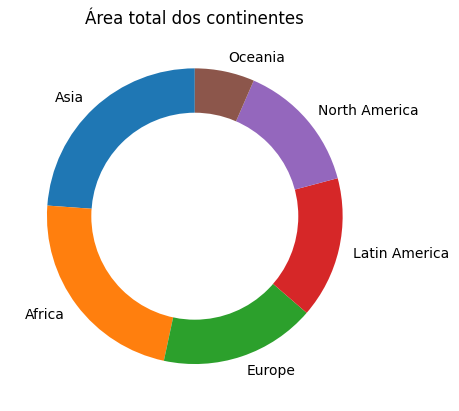

In [54]:
# Iniciar
fig, ax = plt.subplots()

# configurar
ax.pie(
    x=by_continente['land_area'],
    startangle=90,
    labels=by_continente.index
)

hole = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)
ax.set_title('Área total dos continentes')

# Gerar
plt.show()

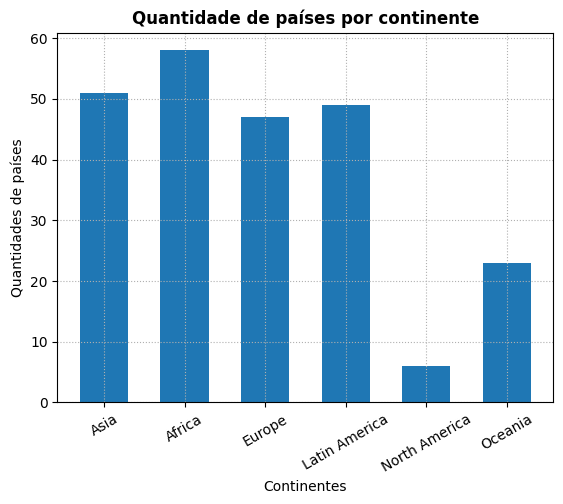

In [55]:
# Iniciar
fig, ax = plt.subplots()

# configurar
ax.bar(
    by_continente.index,
    by_continente['country'],
    width=.6
)

ax.set_title(
    'Quantidade de países por continente',
    weight='bold'
    )

ax.set_xlabel('Continentes')
ax.set_ylabel('Quantidades de países')

ax.xaxis.set_tick_params(rotation=30)

# Gerar
plt.grid(ls=':')
plt.show()

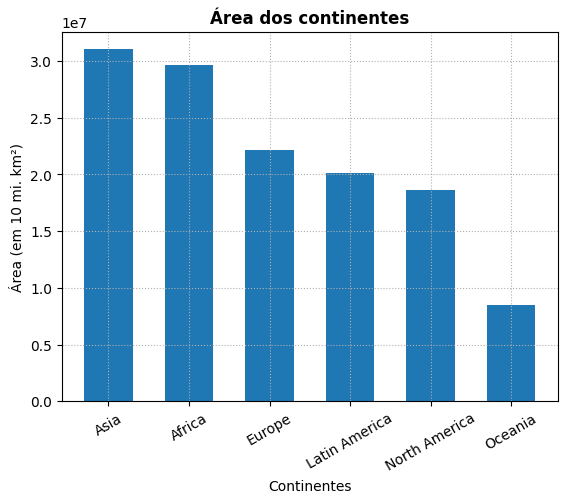

In [56]:
# Iniciar
fig, ax = plt.subplots()

# configurar
ax.bar(
    by_continente.index,
    by_continente['land_area'],
    width=.6
)

ax.set_title(
    'Área dos continentes',
    weight='bold'
    )

ax.set_xlabel('Continentes')
ax.set_ylabel('Área (em 10 mi. km²)')

ax.xaxis.set_tick_params(rotation=30)

# Gerar
plt.grid(ls=':')
plt.show()

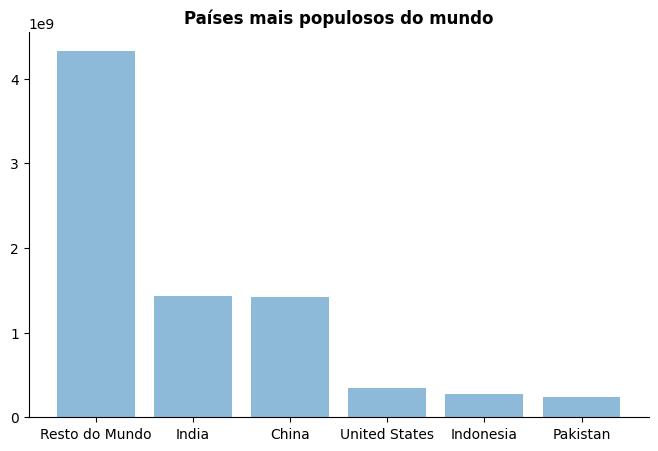

In [60]:
top_five = world_pop_2023[['country','population']].nlargest(5, 'population')
rest_of_world = world_pop_2023[['country','population']].sort_values(by='population',ascending=False).iloc[5:,1:2].sum()
df = pd.concat([top_five, pd.DataFrame(
    {
        'population': rest_of_world, 
        'country':'Resto do Mundo'
        }
     )])

top_five = df.set_index('country').sort_values('population', ascending=False)

# grupo de barras:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(
    x=top_five.index,
    height=top_five['population'],
    alpha=.5,
)

plt.title('Países mais populosos do mundo', weight='bold')

sns.despine()

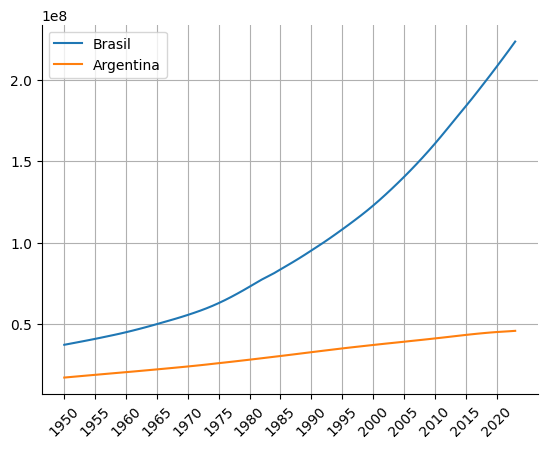

In [112]:
brasil = world_1950_2023.query('country == "Brazil"').iloc[:,1:].transpose()[27]
argentina = world_1950_2023.query('country == "Argentina"').iloc[:,1:].transpose()[8]

fig, ax = plt.subplots()

ax.plot(
    brasil,  
    label='Brasil'
)

ax.plot(
    argentina,  
    label='Argentina'
)

# Ajusta os ticks do eixo X
ax.set_xticks(range(0, len(brasil), 5))  # Seleciona os índices de 5 em 5
ax.set_xticklabels(brasil.index[::5], rotation=45)  # Define os rótulos correspondentes, com rotação

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend()

plt.grid(':')
